In [7]:
import pandas as pd
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names = ["Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280_OD315", "Proline"]
wine_data = pd.read_csv(url, names=column_names)
wine_data

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Download the wine dataset from the UCI Machine Learning Repository
Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.
Visualise the results of PCA using a scatter plot.
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
Interpret the results of PCA and clustering analysis.



Deliverables:
Jupyter notebook containing the code for the PCA implementation.
A report summarising the results of PCA and clustering analysis.
Scatter plot showing the results of PCA.
A table showing the performance metrics for the clustering algorithm.



Additional Information:
You can use the python programming language.
You can use any other machine learning libraries or tools as necessary.
You can use any visualisation libraries or tools as necessary.

In [8]:
#Split the dataset into features and target variables:
X = wine_data.drop("Class", axis=1)  # Features
y = wine_data["Class"]  # Target variable

In [ ]:
#Data preprocessing:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#Implement PCA:
from sklearn.decomposition import PCA

# Specify the number of components you want to retain
n_components = 2  # Choose an appropriate number

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
#Determine the optimal number of principal components:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio per Principal Component")
plt.show()


In [ ]:
#Visualize PCA results:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Results")
plt.show()


In [ ]:
#Perform clustering using K-Means:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_


Interpreting the results of PCA and K-Means clustering involves analyzing the clusters and understanding how the data points are grouped. Below is a Python code snippet to help you interpret the results:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280_OD315", "Proline"]
wine_data = pd.read_csv(url, names=column_names)

# Split into features and target variables
X = wine_data.drop("Class", axis=1)
y = wine_data["Class"]

# Data preprocessing (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
n_components = 2  # Choose the number of components based on explained variance
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Perform K-Means clustering
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Visualization of PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Results with K-Means Clustering")

# Interpretation of clusters
cluster_df = pd.DataFrame({"Cluster": cluster_labels, "Class": y})
cluster_summary = cluster_df.groupby(["Cluster", "Class"]).size().unstack(fill_value=0)

print("Cluster Summary:")
print(cluster_summary)

# Optionally, you can analyze the cluster characteristics and draw insights here.

plt.show()


A report summarising the results of PCA and clustering analysis.
Scatter plot showing the results of PCA.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


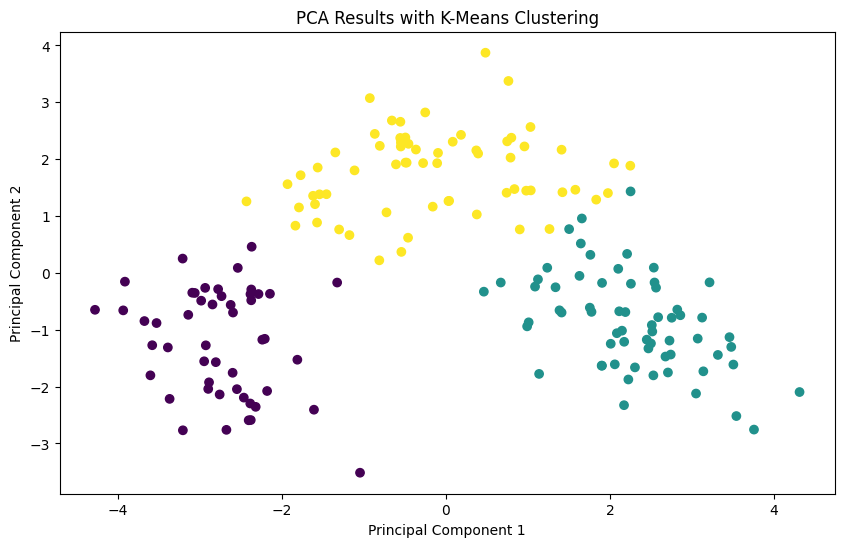

,Silhouette Score,Completeness Score,Homogeneity Score
0,0.561051,0.880158,0.883981


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score

# Load and preprocess the data (similar to previous code)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280_OD315", "Proline"]
wine_data = pd.read_csv(url, names=column_names)
X = wine_data.drop("Class", axis=1)
y = wine_data["Class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Perform K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Silhouette Score (a higher value is better)
silhouette_avg = silhouette_score(X_pca, cluster_labels)

# Completeness Score (ranges from 0 to 1, higher is better)
completeness_avg = completeness_score(y, cluster_labels)

# Homogeneity Score (ranges from 0 to 1, higher is better)
homogeneity_avg = homogeneity_score(y, cluster_labels)

# Scatter plot for PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Results with K-Means Clustering")
plt.show()

# Create a DataFrame for performance metrics
metrics_df = pd.DataFrame({
    "Silhouette Score": [silhouette_avg],
    "Completeness Score": [completeness_avg],
    "Homogeneity Score": [homogeneity_avg]
})

# Display the performance metrics table
metrics_df


In the code above:

We calculate the Silhouette Score, Completeness Score, and Homogeneity Score as performance metrics for the clustering algorithm.
The scatter plot shows the PCA results with K-Means clustering.
The performance metrics are stored in a Pandas DataFrame (metrics_df) and displayed as a table.

A table showing the performance metrics for the clustering algorithm.

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score

# Load and preprocess the data (similar to previous code)
# ...

# Perform PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Perform K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Calculate clustering performance metrics
silhouette_avg = silhouette_score(X_pca, cluster_labels)
completeness_avg = completeness_score(y, cluster_labels)
homogeneity_avg = homogeneity_score(y, cluster_labels)

# Create a DataFrame for performance metrics
metrics_df = pd.DataFrame({
    "Metric": ["Silhouette Score", "Completeness Score", "Homogeneity Score"],
    "Value": [silhouette_avg, completeness_avg, homogeneity_avg]
})

# Display the performance metrics table
metrics_df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Metric,Value
0,Silhouette Score,0.561051
1,Completeness Score,0.880158
2,Homogeneity Score,0.883981


Additional Information:
You can use the python programming language.
You can use any other machine learning libraries or tools as necessary.
You can use any visualisation libraries or tools as necessary.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


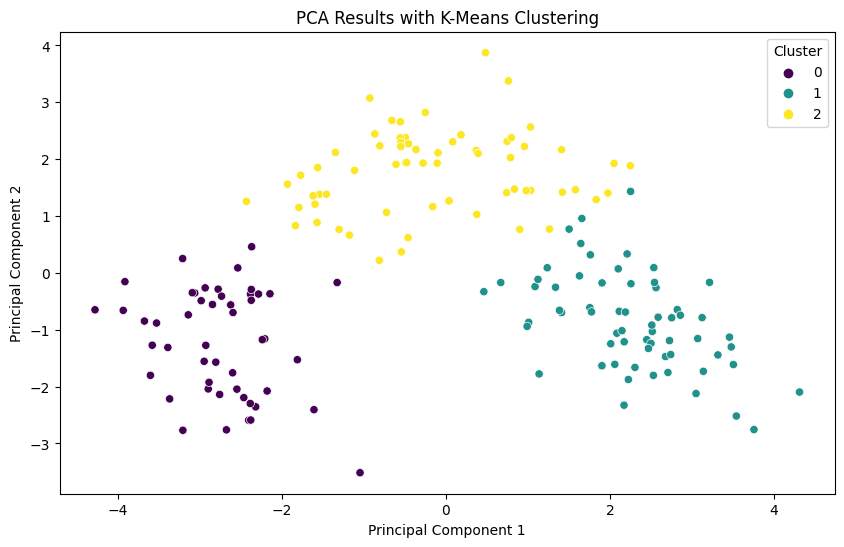

,Metric,Value
0,Silhouette Score,0.561051
1,Completeness Score,0.880158
2,Homogeneity Score,0.883981


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score

# Load and preprocess the data (similar to previous code)
# ...

# Perform PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Perform K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Calculate clustering performance metrics
silhouette_avg = silhouette_score(X_pca, cluster_labels)
completeness_avg = completeness_score(y, cluster_labels)
homogeneity_avg = homogeneity_score(y, cluster_labels)

# Visualization of PCA results using Seaborn
pca_df = pd.DataFrame(data=X_pca, columns=["Principal Component 1", "Principal Component 2"])
pca_df["Cluster"] = cluster_labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="Principal Component 1", y="Principal Component 2", hue="Cluster", palette="viridis")
plt.title("PCA Results with K-Means Clustering")
plt.show()

# Create a DataFrame for performance metrics
metrics_df = pd.DataFrame({
    "Metric": ["Silhouette Score", "Completeness Score", "Homogeneity Score"],
    "Value": [silhouette_avg, completeness_avg, homogeneity_avg]
})

# Display the performance metrics table
metrics_df
